# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/02_Classification/cell_samples.csv"

In [3]:
df = pd.read_csv(path)

#Análsis/exploración básica de la data

* Vistazo a DS (elulas dieron distintas clasifiaciones con respecto a su malignidad del cancer)



In [4]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


* Dimensiones

In [5]:
df.shape

(699, 11)

* Separabilidad (scatter plot)

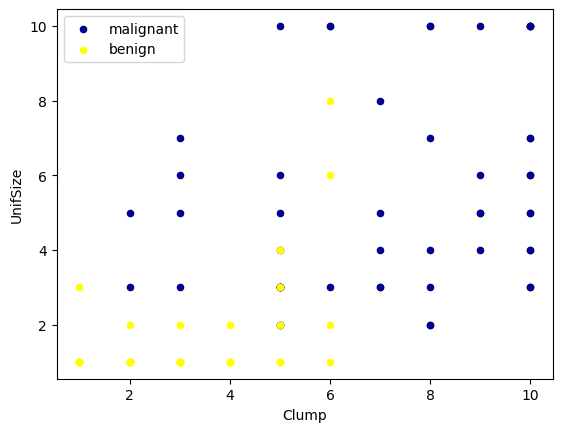

In [6]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y= 'UnifSize', color= 'DarkBlue', label= 'malignant');
df[df[ 'Class'] == 2][0:50].plot(kind='scatter', x='Clump', y= 'UnifSize', color= 'Yellow', label= 'benign', ax=ax);

* Veamos la data (nulos y tales)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Limpieza/preprocesamiento

* Columna BareNuc, aparece cat., pero es numérica. Asegurar conformidad

In [9]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

# Construcción de modelo

## Splits y procesado

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

* Split train y test

In [47]:
 X = df.drop(['Class', 'ID'], axis=1, inplace = False)
 y = df["Class"]

* Split target - features

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4, test_size= 0.2)

## Base Line

## Modelo

In [17]:
from sklearn import svm

* Instancio el modelo

In [77]:
clf = svm.SVC(kernel='rbf')

* Iterar, entreno (asumo un kernell de tipo normal (los asumo linealmente separables). Para Kernels no lineales, los coeficientes no siempre están disponibles

In [78]:
clf.fit(X_train, y_train)

SVC()

* Predigo

In [79]:
yhat = clf.predict(X_test)

* Evaluación/ comununiquemos

In [52]:
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [80]:
#Comunico
accuracy = clf.score(X_test, y_test)
print('SVM Accuracy is: \t', accuracy)

SVM Accuracy is: 	 0.9635036496350365


* Evaluación / Grafico confusion matrix

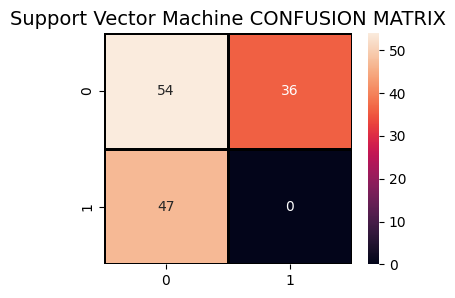

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot= True, fmt = 'd', linecolor='k', linewidth=1)

plt.title('Support Vector Machine CONFUSION MATRIX', fontsize= 14)
plt.show()
#accuracy a superar 96.35, linear
#sigmoid, 39.41%
#rbf,  95.35
# polynomial,  97%, esto fue lo mejor

* Reporte (por clases y general), nos cenctramos en weighted avg

In [55]:
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



* Grafiquemos, área bajo la curva ROC (Puede hacerse con la Pr de pertentencia a la clase, si es que la tenemos, o sino como aqui, con curveRocDisplay)

In [34]:
from sklearn.metrics import RocCurveDisplay

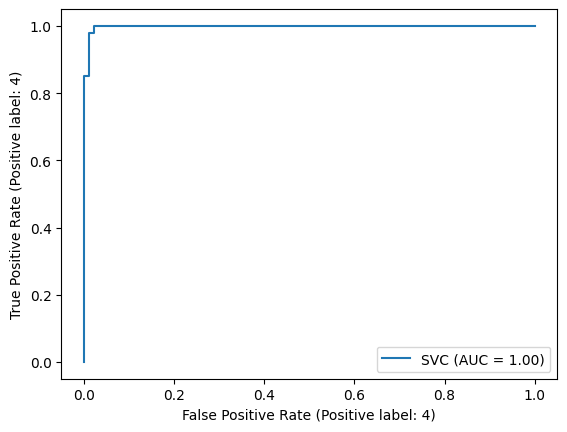

In [56]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

plt.show();

# Comuniquemos resultados

* Coeficientes del modelo (puede que Coefs no estén dispoinbles sino es lineal)

Axes(0.125,0.11;0.775x0.77)


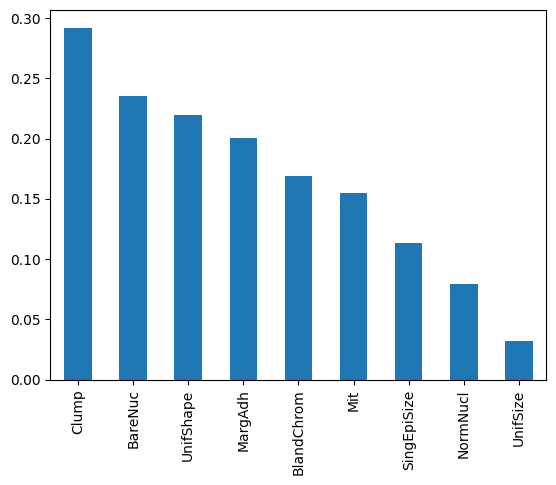

In [57]:
weights = pd.Series(clf.coef_[0],
                    index= ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 
                            'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit'])

print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

# Probemos distintos Kernels, matrx de confusion y accuracy

Posibles kernels típicos:
1. linear.
2. Sigmoid.
3. poly (polynomial).
4. rbf